# Traning Deep Neural Networks

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Vanishing/Exploding Gradients Problem

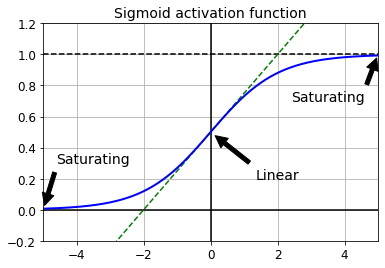

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [3]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [4]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [5]:
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

### Nonsaturating Activation Functions

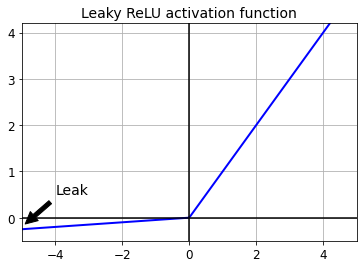

In [6]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [7]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 77us/sample - loss: 1.2810 - accuracy: 0.6205 - val_loss: 0.8869 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.7952 - accuracy: 0.7368 - val_loss: 0.7132 - val_accuracy: 0.7626
Epoch 3/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.6817 - accuracy: 0.7726 - val_loss: 0.6385 - val_accuracy: 0.7896
Epoch 4/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.6219 - accuracy: 0.7942 - val_loss: 0.5931 - val_accuracy: 0.8016
Epoch 5/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5829 - accuracy: 0.8074 - val_loss: 0.5607 - val_accuracy: 0.8166
Epoch 6/10
55000/55000 [==============================] - 4s 64us/sample - loss: 0.5552 - accuracy: 0.8172 - val_loss: 0.5354 - val_accuracy: 0.8240
Epoch 7/10
55000/55000 [==============================] -

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 75us/sample - loss: 1.3452 - accuracy: 0.6203 - val_loss: 0.9241 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.8196 - accuracy: 0.7364 - val_loss: 0.7314 - val_accuracy: 0.7602
Epoch 3/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.6970 - accuracy: 0.7701 - val_loss: 0.6517 - val_accuracy: 0.7876
Epoch 4/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.6333 - accuracy: 0.7914 - val_loss: 0.6033 - val_accuracy: 0.8052
Epoch 5/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.5917 - accuracy: 0.8049 - val_loss: 0.5689 - val_accuracy: 0.8164
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.5620 - accuracy: 0.8144 - val_loss: 0.5417 - val_accuracy: 0.8222
Epoch 7/10
55000/55000 [==============================] -

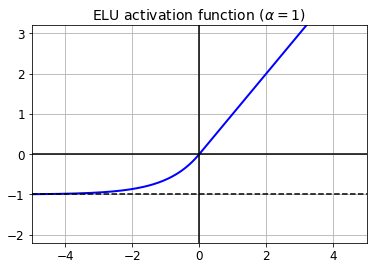

In [15]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [16]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

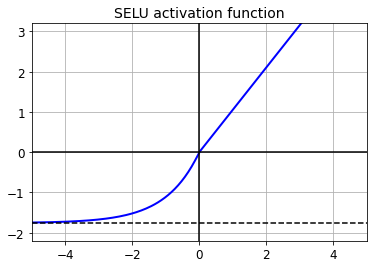

In [17]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [18]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [19]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 22s 399us/sample - loss: 1.3274 - accuracy: 0.4750 - val_loss: 0.8742 - val_accuracy: 0.6648
Epoch 2/5
55000/55000 [==============================] - 19s 349us/sample - loss: 0.7918 - accuracy: 0.6887 - val_loss: 0.7308 - val_accuracy: 0.7148
Epoch 3/5
55000/55000 [==============================] - 19s 350us/sample - loss: 0.6712 - accuracy: 0.7522 - val_loss: 0.7683 - val_accuracy: 0.7216
Epoch 4/5
55000/55000 [==============================] - 19s 350us/sample - loss: 0.5875 - accuracy: 0.7843 - val_loss: 0.5822 - val_accuracy: 0.7968
Epoch 5/5
55000/55000 [==============================] - 19s 349us/sample - loss: 0.5413 - accuracy: 0.8039 - val_loss: 0.5261 - val_accuracy: 0.8154


In [21]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu",
                             kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu",
                                 kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 20s 360us/sample - loss: 1.7718 - accuracy: 0.2779 - val_loss: 1.3073 - val_accuracy: 0.4286
Epoch 2/5
55000/55000 [==============================] - 17s 308us/sample - loss: 1.2002 - accuracy: 0.4844 - val_loss: 1.1347 - val_accuracy: 0.5288
Epoch 3/5
55000/55000 [==============================] - 17s 307us/sample - loss: 1.0251 - accuracy: 0.5629 - val_loss: 1.1259 - val_accuracy: 0.5140
Epoch 4/5
55000/55000 [==============================] - 17s 307us/sample - loss: 0.8917 - accuracy: 0.6316 - val_loss: 0.7785 - val_accuracy: 0.6922
Epoch 5/5
55000/55000 [==============================] - 17s 317us/sample - loss: 0.7865 - accuracy: 0.6874 - val_loss: 0.7421 - val_accuracy: 0.7236


### Batch Normalization

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_210 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_211 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_212 (Dense)            (None, 10)               

In [25]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [26]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.8761 - accuracy: 0.7124 - val_loss: 0.5508 - val_accuracy: 0.8222
Epoch 2/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5737 - accuracy: 0.8038 - val_loss: 0.4723 - val_accuracy: 0.8458
Epoch 3/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5142 - accuracy: 0.8231 - val_loss: 0.4376 - val_accuracy: 0.8572
Epoch 4/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4825 - accuracy: 0.8332 - val_loss: 0.4135 - val_accuracy: 0.8634
Epoch 5/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4571 - accuracy: 0.8414 - val_loss: 0.3990 - val_accuracy: 0.8652
Epoch 6/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4432 - accuracy: 0.8457 - val_loss: 0.3870 - val_accuracy: 0.8704
Epoch 7/10
55000/55000 [===========================

### Gradient Clipping

In [29]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [30]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers

In [31]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [32]:
X_train_A.shape

(43986, 28, 28)

In [33]:
X_train_B.shape

(200, 28, 28)

In [34]:
y_train_A[:10]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4], dtype=uint8)

In [35]:
y_train_B[:10]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [36]:
tf.random.set_seed(42)
np.random.seed(42)

In [37]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [38]:
model_A.compile(loss='sparse_categorical_crossentropy', 
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [39]:
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 80us/sample - loss: 0.5902 - accuracy: 0.8131 - val_loss: 0.3784 - val_accuracy: 0.8692
Epoch 2/20
43986/43986 [==============================] - 3s 72us/sample - loss: 0.3518 - accuracy: 0.8783 - val_loss: 0.3369 - val_accuracy: 0.8829
Epoch 3/20
43986/43986 [==============================] - 3s 72us/sample - loss: 0.3163 - accuracy: 0.8896 - val_loss: 0.3016 - val_accuracy: 0.8961
Epoch 4/20
43986/43986 [==============================] - 3s 71us/sample - loss: 0.2970 - accuracy: 0.8973 - val_loss: 0.2913 - val_accuracy: 0.9028
Epoch 5/20
43986/43986 [==============================] - 3s 71us/sample - loss: 0.2832 - accuracy: 0.9025 - val_loss: 0.2817 - val_accuracy: 0.9018
Epoch 6/20
43986/43986 [==============================] - 3s 72us/sample - loss: 0.2726 - accuracy: 0.9064 - val_loss: 0.2737 - val_accuracy: 0.9073
Epoch 7/20
43986/43986 [==============================] -

In [40]:
model_A.save("my_model_A.h5")

In [41]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [42]:
model_B.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [43]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.9509 - accuracy: 0.4800 - val_loss: 0.6533 - val_accuracy: 0.5568
Epoch 2/20
200/200 [==============================] - 0s 348us/sample - loss: 0.5837 - accuracy: 0.7100 - val_loss: 0.4825 - val_accuracy: 0.8479
Epoch 3/20
200/200 [==============================] - 0s 372us/sample - loss: 0.4527 - accuracy: 0.8750 - val_loss: 0.4097 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 335us/sample - loss: 0.3869 - accuracy: 0.9050 - val_loss: 0.3630 - val_accuracy: 0.9209
Epoch 5/20
200/200 [==============================] - 0s 325us/sample - loss: 0.3404 - accuracy: 0.9300 - val_loss: 0.3302 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 0s 337us/sample - loss: 0.3073 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9381
Epoch 7/20
200/200 [==============================] - 0s 329us/sample - loss: 0.

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_210 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_211 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_212 (Dense)            (None, 10)               

In [45]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [46]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [47]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [48]:
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [49]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 0.5642 - accuracy: 0.6650 - val_loss: 0.5691 - val_accuracy: 0.6511
Epoch 2/4
200/200 [==============================] - 0s 341us/sample - loss: 0.5270 - accuracy: 0.7150 - val_loss: 0.5357 - val_accuracy: 0.6927
Epoch 3/4
200/200 [==============================] - 0s 327us/sample - loss: 0.4942 - accuracy: 0.7400 - val_loss: 0.5056 - val_accuracy: 0.7181
Epoch 4/4
200/200 [==============================] - 0s 330us/sample - loss: 0.4647 - accuracy: 0.7550 - val_loss: 0.4789 - val_accuracy: 0.7383


In [50]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.3876 - accuracy: 0.8250 - val_loss: 0.3363 - val_accuracy: 0.8682
Epoch 2/16
200/200 [==============================] - 0s 342us/sample - loss: 0.2704 - accuracy: 0.9350 - val_loss: 0.2610 - val_accuracy: 0.9249
Epoch 3/16
200/200 [==============================] - 0s 335us/sample - loss: 0.2083 - accuracy: 0.9650 - val_loss: 0.2151 - val_accuracy: 0.9513
Epoch 4/16
200/200 [==============================] - 0s 335us/sample - loss: 0.1697 - accuracy: 0.9800 - val_loss: 0.1841 - val_accuracy: 0.9625
Epoch 5/16
200/200 [==============================] - 0s 340us/sample - loss: 0.1430 - accuracy: 0.9800 - val_loss: 0.1603 - val_accuracy: 0.9716
Epoch 6/16
200/200 [==============================] - 0s 345us/sample - loss: 0.1222 - accuracy: 0.9850 - val_loss: 0.1425 - val_accuracy: 0.9787
Epoch 7/16
200/200 [==============================] - 0s 343us/sample - loss: 0.

In [51]:
model_B.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 48us/sample - loss: 0.1426 - accuracy: 0.9695


[0.14263125371932983, 0.9695]

In [52]:
model_B_on_A.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 44us/sample - loss: 0.0698 - accuracy: 0.9925


[0.06977993494272232, 0.9925]

## Faster Optimizers

In [53]:
# Momentum optimization
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# AdaGrad
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Adam
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Adamx
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Nadam
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Learning Rate Scheduling

In [54]:
# Power Scheduling

optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5318 - accuracy: 0.8156 - val_loss: 0.4042 - val_accuracy: 0.8574
Epoch 2/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3743 - accuracy: 0.8662 - val_loss: 0.3631 - val_accuracy: 0.8738
Epoch 3/25
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3374 - accuracy: 0.8792 - val_loss: 0.3529 - val_accuracy: 0.8776
Epoch 4/25
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3146 - accuracy: 0.8870 - val_loss: 0.3386 - val_accuracy: 0.8814
Epoch 5/25
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2974 - accuracy: 0.8940 - val_loss: 0.3327 - val_accuracy: 0.8822
Epoch 6/25
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2842 - accuracy: 0.8981 - val_loss: 0.3297 - val_accuracy: 0.8832
Epoch 7/25
55000/55000 [==============================] -

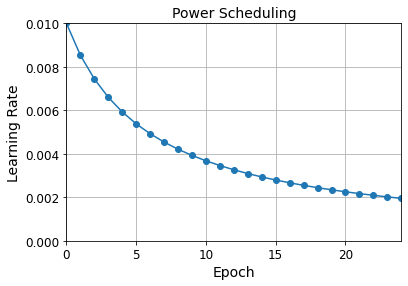

In [55]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [56]:
# Exponential Scheduling

def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 134us/sample - loss: 0.8681 - accuracy: 0.7522 - val_loss: 0.7890 - val_accuracy: 0.7780
Epoch 2/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.7511 - accuracy: 0.7758 - val_loss: 0.6947 - val_accuracy: 0.8024
Epoch 3/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.6508 - accuracy: 0.8076 - val_loss: 0.7828 - val_accuracy: 0.7896
Epoch 4/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.6053 - accuracy: 0.8257 - val_loss: 0.6703 - val_accuracy: 0.7838
Epoch 5/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.5086 - accuracy: 0.8433 - val_loss: 0.5198 - val_accuracy: 0.8430
Epoch 6/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4799 - accuracy: 0.8548 - val_loss: 0.5710 - val_accuracy: 0.8528
Epoch 7/25
55000/55000 [===========================

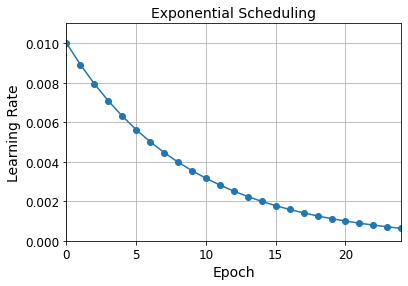

In [57]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [58]:
# update the learning rate at each iteration rather than at each epoch

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 8s 148us/sample - loss: 0.7823 - accuracy: 0.7676 - val_loss: 0.7173 - val_accuracy: 0.7226
Epoch 2/25
55000/55000 [==============================] - 8s 138us/sample - loss: 0.6698 - accuracy: 0.7973 - val_loss: 0.5513 - val_accuracy: 0.8260
Epoch 3/25
55000/55000 [==============================] - 8s 139us/sample - loss: 0.5773 - accuracy: 0.8218 - val_loss: 0.6204 - val_accuracy: 0.7970
Epoch 4/25
55000/55000 [==============================] - 8s 139us/sample - loss: 0.5162 - accuracy: 0.8412 - val_loss: 0.6373 - val_accuracy: 0.8526
Epoch 5/25
55000/55000 [==============================] - 8s 139us/sample - loss: 0.4473 - accuracy: 0.8563 - val_loss: 0.5440 - val_accuracy: 0.8602
Epoch 6/25
55000/55000 [==============================] - 8s 140us/sample - loss: 0.4327 - accuracy: 0.8630 - val_loss: 0.4999 - val_accuracy: 0.8484
Epoch 7/25
55000/55000 [===========================

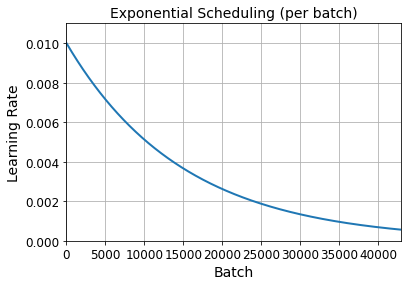

In [59]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [60]:
# Piecewise Constant Scheduling

def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [61]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 8s 139us/sample - loss: 0.8960 - accuracy: 0.7391 - val_loss: 1.2079 - val_accuracy: 0.5856
Epoch 2/25
55000/55000 [==============================] - 7s 130us/sample - loss: 0.8131 - accuracy: 0.7655 - val_loss: 0.7088 - val_accuracy: 0.8088
Epoch 3/25
55000/55000 [==============================] - 7s 131us/sample - loss: 0.8643 - accuracy: 0.7571 - val_loss: 0.7973 - val_accuracy: 0.7654
Epoch 4/25
55000/55000 [==============================] - 7s 128us/sample - loss: 0.8079 - accuracy: 0.7656 - val_loss: 1.5835 - val_accuracy: 0.6438
Epoch 5/25
55000/55000 [==============================] - 7s 128us/sample - loss: 0.8284 - accuracy: 0.7474 - val_loss: 0.9429 - val_accuracy: 0.7000
Epoch 6/25
55000/55000 [==============================] - 7s 127us/sample - loss: 0.5375 - accuracy: 0.8194 - val_loss: 0.7301 - val_accuracy: 0.8056
Epoch 7/25
55000/55000 [===========================

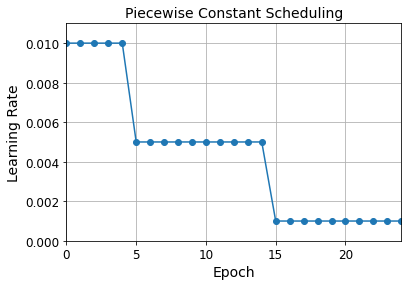

In [62]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [63]:
# Performance Scheduling

tf.random.set_seed(42)
np.random.seed(42)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 80us/sample - loss: 0.5922 - accuracy: 0.8075 - val_loss: 0.5042 - val_accuracy: 0.8444
Epoch 2/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5016 - accuracy: 0.8392 - val_loss: 0.5031 - val_accuracy: 0.8496
Epoch 3/25
55000/55000 [==============================] - 4s 74us/sample - loss: 0.4994 - accuracy: 0.8459 - val_loss: 0.4550 - val_accuracy: 0.8380
Epoch 4/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5093 - accuracy: 0.8463 - val_loss: 0.6428 - val_accuracy: 0.8330
Epoch 5/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5205 - accuracy: 0.8490 - val_loss: 0.5313 - val_accuracy: 0.8464
Epoch 6/25
55000/55000 [==============================] - 4s 79us/sample - loss: 0.5323 - accuracy: 0.8490 - val_loss: 0.7951 - val_accuracy: 0.8524
Epoch 7/25
55000/55000 [==============================] -

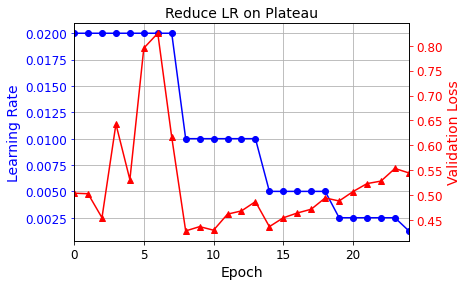

In [64]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [65]:
# 1Cycle scheduling

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [66]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 55000 samples
55000/55000 [==============================] - 2s 31us/sample - loss: nan - accuracy: 0.3880


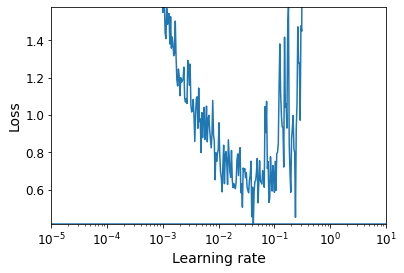

In [67]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [68]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [69]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 2s 30us/sample - loss: 0.6576 - accuracy: 0.7743 - val_loss: 0.4901 - val_accuracy: 0.8300
Epoch 2/25
55000/55000 [==============================] - 2s 29us/sample - loss: 0.4587 - accuracy: 0.8385 - val_loss: 0.4316 - val_accuracy: 0.8492
Epoch 3/25
55000/55000 [==============================] - 2s 29us/sample - loss: 0.4119 - accuracy: 0.8561 - val_loss: 0.4120 - val_accuracy: 0.8574
Epoch 4/25
55000/55000 [==============================] - 1s 26us/sample - loss: 0.3842 - accuracy: 0.8658 - val_loss: 0.3921 - val_accuracy: 0.8638
Epoch 5/25
55000/55000 [==============================] - 1s 26us/sample - loss: 0.3636 - accuracy: 0.8707 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 6/25
55000/55000 [==============================] - 1s 26us/sample - loss: 0.3460 - accuracy: 0.8765 - val_loss: 0.3742 - val_accuracy: 0.8690
Epoch 7/25
55000/55000 [==============================] -

## Avoid Overfitting Through Regularization

In [70]:
layer = keras.layers.Dense(100, activation='elu',
                            kernel_initializer='he_normal', 
                            kernel_regularizer=keras.regularizers.l2(0.01))

In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 9s 158us/sample - loss: 1.5735 - accuracy: 0.8126 - val_loss: 0.7327 - val_accuracy: 0.8222
Epoch 2/2
55000/55000 [==============================] - 8s 141us/sample - loss: 0.7186 - accuracy: 0.8260 - val_loss: 0.6929 - val_accuracy: 0.8338


In [72]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 9s 161us/sample - loss: 1.6006 - accuracy: 0.8129 - val_loss: 0.7374 - val_accuracy: 0.8236
Epoch 2/2
55000/55000 [==============================] - 8s 148us/sample - loss: 0.7179 - accuracy: 0.8265 - val_loss: 0.6905 - val_accuracy: 0.8356


In [73]:
# Dropout

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 9s 156us/sample - loss: 0.5856 - accuracy: 0.7993 - val_loss: 0.3908 - val_accuracy: 0.8570
Epoch 2/2
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4260 - accuracy: 0.8443 - val_loss: 0.3393 - val_accuracy: 0.8736


In [74]:
# Alpha Dropout

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 106us/sample - loss: 0.6655 - accuracy: 0.7580 - val_loss: 0.6760 - val_accuracy: 0.8268
Epoch 2/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5527 - accuracy: 0.7969 - val_loss: 0.5919 - val_accuracy: 0.8400
Epoch 3/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5255 - accuracy: 0.8065 - val_loss: 0.5318 - val_accuracy: 0.8460
Epoch 4/20
55000/55000 [==============================] - 5s 99us/sample - loss: 0.5054 - accuracy: 0.8139 - val_loss: 0.4908 - val_accuracy: 0.8598
Epoch 5/20
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4936 - accuracy: 0.8167 - val_loss: 0.4896 - val_accuracy: 0.8610
Epoch 6/20
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4772 - accuracy: 0.8223 - val_loss: 0.5120 - val_accuracy: 0.8570
Epoch 7/20
55000/55000 [==============================]

In [75]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.4703 - accuracy: 0.8710


[0.4702894482970238, 0.871]

In [76]:
model.evaluate(X_train_scaled, y_train)

55000/55000 [==============================] - 2s 39us/sample - loss: 0.3457 - accuracy: 0.8887


[0.3457232044664296, 0.88872725]

In [77]:
history = model.fit(X_train_scaled, y_train)

Train on 55000 samples
55000/55000 [==============================] - 6s 100us/sample - loss: 0.4149 - accuracy: 0.8458


In [78]:
# MC Dropout

y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [79]:
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8636

In [80]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [81]:
mc_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_254 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_255 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_256 (Dense)            (None, 10)              

In [82]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

mc_model.set_weights(model.get_weights())

In [83]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.17, 0.  , 0.75]],
      dtype=float32)

In [84]:
# Max norm

layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 8s 151us/sample - loss: 0.4727 - accuracy: 0.8343 - val_loss: 0.4184 - val_accuracy: 0.8572
Epoch 2/2
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3582 - accuracy: 0.8684 - val_loss: 0.3475 - val_accuracy: 0.8768
